In [1]:
#import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")
inspector = inspect(engine)
Base = automap_base()

In [5]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
m = Base.classes.measurement
s = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
#inspect the tables/columns 
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

print(f'--------------')
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
--------------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
last_date = session.query(m.date).order_by(m.id.desc()).first()
print(last_date)

#collect the first date as well - for later!
first_date = session.query(m.date).order_by(m.id).first()
print(first_date)

('2017-08-23',)
('2010-01-01',)


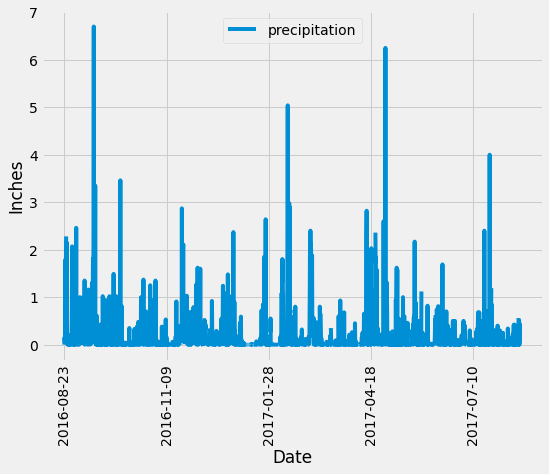

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot 
#the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
latest_date = dt.datetime.strptime(last_date[0], '%Y-%m-%d')
last_year = latest_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = session.query(m.date, m.prcp).filter(m.date > '2016-08-22').order_by(m.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(data, columns=['Date', 'prcp'])

# Sort the dataframe by date
prcp_df.dropna(how='any')
prcp_df.sort_values(by='Date')
prcp_df.set_index('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data and save the figure
df_plot = prcp_df.plot(rot=90, figsize=(8,6))
df_plot.set_ylabel('Inches')
df_plot.legend(['precipitation'], loc=9)
plt.show()
fig_1 = df_plot.get_figure()
fig_1.savefig("fig_1.png")

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(distinct(m.station))).all()
print(station_count)

[(9,)]


In [14]:
# Design a query to find the most active stations 
#(i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(m.station, func.count(m.date)).group_by(m.station).order_by(func.count(m.date).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, 
#calculate the lowest, highest, and average temperature.
#save the station id as a variable
station_id = 'USC00519281'
#query the db
temps = session.query(func.min(m.tobs), func.max(m.tobs), func.avg(m.tobs)).filter(m.station == station_id).all()
print(temps)

[(54.0, 85.0, 71.66378066378067)]


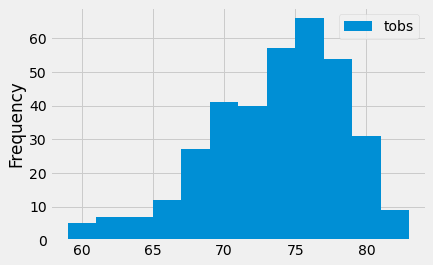

In [19]:
#find previous year date using dt
last = session.query(func.max(m.date)).filter(m.station == station_id).first()
latest_date = dt.datetime.strptime(last[0], '%Y-%m-%d')
last_year = latest_date - dt.timedelta(days=365)

#query the db 
data = session.query(m.tobs, m.date).filter(m.date > '2016-08-18').\
    filter(m.station == station_id).all()

#plot histogram and save
results = pd.DataFrame(data)
fig_2 = results.plot.hist(bins=12)
fig = fig_2.get_figure()
fig.savefig("fig_2.png")

# Close Session

In [20]:
# Close Session
session.close()